In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel("/content/drive/MyDrive/KCCP/Good.xlsx")
type01 = pd.read_excel("/content/drive/MyDrive/KCCP/Anomaly/Type 01.xlsx")
type02 = pd.read_excel("/content/drive/MyDrive/KCCP/Anomaly/Type 02.xlsx")
type03 = pd.read_excel("/content/drive/MyDrive/KCCP/Anomaly/Type 03.xlsx")


In [ ]:
type1 = type01[:100000] #923400
type2 = type02[:100000] #963200
type3 = type03[:100000] #261400


In [ ]:
# type 01
type1A = np.array(type1.loc[:, 'bb10'])
type1B = np.array(type1.loc[:, 'TNH'])
type1C = np.array(type1.loc[:, 'DWATT'])
type1D = np.array(type1.loc[:, 'btgj1'])

# type 02
type2A = np.array(type2.loc[:, 'bb10'])
type2B = np.array(type2.loc[:, 'TNH'])
type2C = np.array(type2.loc[:, 'DWATT'])
type2D = np.array(type2.loc[:, 'btgj1'])

# type 03
type3A = np.array(type3.loc[:, 'bb10'])
type3B = np.array(type3.loc[:, 'TNH'])
type3C = np.array(type3.loc[:, 'DWATT'])
type3D = np.array(type3.loc[:, 'btgj1'])


In [ ]:
type2A.shape

(100000,)

In [ ]:
#apped stages
datasetA1 = np.append(type1A,type2A, axis=0)
datasetA1 = np.append(datasetA1, type3A, axis=0)

datasetB1 = np.append(type1B, type2B, axis=0)
datasetB1 = np.append(datasetB1, type3B, axis=0)

datasetC1 = np.append(type1C,type2C, axis=0)
datasetC1 = np.append(datasetC1, type3C, axis=0)

datasetD1 = np.append(type1D,type2D, axis=0)
datasetD1 = np.append(datasetD1, type3D, axis=0)

datasetA1

array([0.40951368, 0.40831387, 0.40872183, ..., 0.35251439, 0.35250777,
       0.35316712])

In [ ]:
datasetA1.shape

(300000,)

In [ ]:
# Good data
dataset = dataset[:100000]

In [ ]:
# Good data
datasetA = dataset.loc[:, 'bb10']
datasetB = dataset.loc[:, 'TNH']
datasetC = dataset.loc[:, 'DWATT']
datasetD = dataset.loc[:, 'btgj1']

In [ ]:
GoodDataA = np.array(datasetA)
GoodDataB = np.array(datasetB)
GoodDataC = np.array(datasetC)
GoodDataD = np.array(datasetD)
GoodDataA.shape

(100000,)

In [ ]:
AnomalyDataA = datasetA1
AnomalyDataB = datasetB1
AnomalyDataC = datasetC1
AnomalyDataD = datasetD1

In [ ]:
# without scalar

GoodDataA_scaled = GoodDataA
GoodDataB_scaled = GoodDataB
GoodDataC_scaled = GoodDataC
GoodDataD_scaled = GoodDataD

AnomalyDataA_scaled = AnomalyDataA
AnomalyDataB_scaled = AnomalyDataB
AnomalyDataC_scaled = AnomalyDataC
AnomalyDataD_scaled = AnomalyDataD

In [ ]:
GoodDataA

array([0.06551117, 0.06551506, 0.06633957, ..., 0.16205481, 0.16042608,
       0.16083635])

In [ ]:
# Labels
labels1 = []
for k in range(1000): # 1140
  labels1.append(0)
for l in range(1000): # 9234
  labels1.append(1)
for o in range(1000): # 9632
  labels1.append(2)
for p in range(1000): # 2614
  labels1.append(3)
labels1 = np.array(labels1)
labels1.shape

(4000,)

In [ ]:
# A - bb10

a = min(GoodDataA_scaled)
l = max(GoodDataA_scaled)-min(GoodDataA_scaled)

r = 0
for i in range(1000):
  p = []
  for j in range(100):
    p.append((GoodDataA_scaled[r]-a)/l)
    r = r + 1
  if i == 0:
    dataA = np.array([p])
  else:
    dataA = np.append(dataA, [p], axis = 0)
dataA

array([[0.05846722, 0.05850233, 0.06594525, ..., 0.05123111, 0.05124517,
        0.05515179],
       [0.0514768 , 0.05516746, 0.05518266, ..., 0.04769763, 0.04229791,
        0.04362287],
       [0.04398801, 0.03663978, 0.03661442, ..., 0.04742807, 0.05139535,
        0.05139798],
       ...,
       [0.92246442, 0.92611553, 0.92242891, ..., 0.95551987, 0.94815887,
        0.94081158],
       [0.94446242, 0.93339704, 0.94073921, ..., 0.92243819, 0.92245594,
        0.9188273 ],
       [0.92253369, 0.92621144, 0.93355092, ..., 0.92997406, 0.91527142,
        0.91897499]])

In [ ]:
dataA.shape

(1000, 100)

In [ ]:
# B - TNH

a = min(GoodDataB_scaled)
l = max(GoodDataB_scaled)-min(GoodDataB_scaled)

r = 0
for i in range(1000):
  p = []
  for j in range(100):
    p.append((GoodDataB_scaled[r]-a)/l)
    r = r + 1
  if i == 0:
    dataB = np.array([p])
  else:
    dataB = np.append(dataB, [p], axis = 0)
dataB

array([[0.        , 0.00405525, 0.00773692, ..., 0.35692588, 0.36076976,
        0.36350275],
       [0.36703205, 0.37025167, 0.37309772, ..., 0.66938163, 0.67132323,
        0.67487218],
       [0.67789519, 0.68099688, 0.68351356, ..., 0.8395547 , 0.83918108,
        0.83838972],
       ...,
       [0.8311296 , 0.83145399, 0.83139008, ..., 0.83190621, 0.83202914,
        0.83255017],
       [0.83228962, 0.83300729, 0.83300729, ..., 0.84305449, 0.84402773,
        0.84493707],
       [0.84472574, 0.84523202, 0.84617086, ..., 0.85271828, 0.85252164,
        0.85213333]])

In [ ]:
# C - DWATT

a = min(GoodDataC_scaled)
l = max(GoodDataC_scaled)-min(GoodDataC_scaled)

r = 0
for i in range(1000):
  p = []
  for j in range(100):
    p.append((GoodDataC_scaled[r]-a)/l)
    r = r + 1
  if i == 0:
    dataC = np.array([p])
  else:
    dataC = np.append(dataC, [p], axis = 0)
dataC

array([[3.07077663e-04, 2.45151305e-04, 3.25539066e-04, ...,
        3.68331882e-04, 2.45016877e-04, 2.44927259e-04],
       [4.30168621e-04, 1.82821664e-04, 4.30079003e-04, ...,
        3.68645547e-04, 2.61372246e-04, 3.68242264e-04],
       [1.82642427e-04, 4.46389563e-04, 1.82418381e-04, ...,
        3.07570564e-04, 2.59266213e-04, 4.31199233e-04],
       ...,
       [9.89042328e-01, 9.88486776e-01, 9.88486984e-01, ...,
        9.90163998e-01, 9.90472330e-01, 9.90781634e-01],
       [9.90905801e-01, 9.90411429e-01, 9.90350388e-01, ...,
        9.87018398e-01, 9.86462846e-01, 9.86399928e-01],
       [9.85843750e-01, 9.85906320e-01, 9.85596947e-01, ...,
        9.88383396e-01, 9.88938322e-01, 9.89556583e-01]])

In [ ]:
# D - btgj1

a = min(GoodDataD_scaled)
l = max(GoodDataD_scaled)-min(GoodDataD_scaled)

r = 0
for i in range(1000):
  p = []
  for j in range(100):
    p.append((GoodDataD_scaled[r]-a)/l)
    r = r + 1
  if i == 0:
    dataD = np.array([p])
  else:
    dataD = np.append(dataD, [p], axis = 0)
dataD.shape

(1000, 100)

In [ ]:
# A - bb10

a = min(GoodDataA_scaled)
l = max(GoodDataA_scaled)-min(GoodDataA_scaled)

r = 0
for i in range(3000):
  p = []
  for j in range(100):
    p.append((AnomalyDataA_scaled[r]-a)/l)
    r = r + 1
  dataA = np.append(dataA, [p], axis = 0)
dataA

array([[0.05846722, 0.05850233, 0.06594525, ..., 0.05123111, 0.05124517,
        0.05515179],
       [0.0514768 , 0.05516746, 0.05518266, ..., 0.04769763, 0.04229791,
        0.04362287],
       [0.04398801, 0.03663978, 0.03661442, ..., 0.04742807, 0.05139535,
        0.05139798],
       ...,
       [2.65554707, 2.66026367, 2.66298838, ..., 2.6564962 , 2.66306802,
        2.65569073],
       [2.65565576, 2.65642922, 2.65929087, ..., 2.67129785, 2.66767162,
        2.66764095],
       [2.66028492, 2.66264645, 2.66287835, ..., 2.64926742, 2.6492077 ,
        2.65515967]])

In [ ]:
# B - TNH

a = min(GoodDataB_scaled)
l = max(GoodDataB_scaled)-min(GoodDataB_scaled)

r = 0
for i in range(3000):
  p = []
  for j in range(100):
    p.append((AnomalyDataB_scaled[r]-a)/l)
    r = r + 1
  dataB = np.append(dataB, [p], axis = 0)
dataB.shape

(4000, 100)

In [ ]:
# C - DWATT

a = min(GoodDataC_scaled)
l = max(GoodDataC_scaled)-min(GoodDataC_scaled)

r = 0
for i in range(3000):
  p = []
  for j in range(100):
    p.append((AnomalyDataC_scaled[r]-a)/l)
    r = r + 1
  dataC = np.append(dataC, [p], axis = 0)
dataC

array([[3.07077663e-04, 2.45151305e-04, 3.25539066e-04, ...,
        3.68331882e-04, 2.45016877e-04, 2.44927259e-04],
       [4.30168621e-04, 1.82821664e-04, 4.30079003e-04, ...,
        3.68645547e-04, 2.61372246e-04, 3.68242264e-04],
       [1.82642427e-04, 4.46389563e-04, 1.82418381e-04, ...,
        3.07570564e-04, 2.59266213e-04, 4.31199233e-04],
       ...,
       [9.58628589e-01, 9.58504979e-01, 9.58381646e-01, ...,
        9.61224617e-01, 9.60235108e-01, 9.59123240e-01],
       [9.58318242e-01, 9.57700259e-01, 9.58008382e-01, ...,
        9.62276906e-01, 9.62091142e-01, 9.62091629e-01],
       [9.62276975e-01, 9.61905518e-01, 9.61781699e-01, ...,
        9.54613056e-01, 9.53993822e-01, 9.54179864e-01]])

In [ ]:
# D - btgj1

a = min(GoodDataD_scaled)
l = max(GoodDataD_scaled)-min(GoodDataD_scaled)

r = 0
for i in range(3000):
  p = []
  for j in range(100):
    p.append((AnomalyDataD_scaled[r]-a)/l)
    r = r + 1
  dataD = np.append(dataD, [p], axis = 0)
dataD

array([[0.        , 0.00125823, 0.00125823, ..., 0.02659653, 0.02659653,
        0.02659653],
       [0.02659653, 0.03015763, 0.03015763, ..., 0.04878901, 0.04878901,
        0.04878901],
       [0.04878901, 0.0536192 , 0.0536192 , ..., 0.07093185, 0.07093185,
        0.07093185],
       ...,
       [1.03280699, 1.03280699, 1.03280699, ..., 1.03147688, 1.03147688,
        1.03147688],
       [1.03147688, 1.03147688, 1.03147688, ..., 1.02789303, 1.02430659,
        1.02430659],
       [1.02430659, 1.02430659, 1.02430659, ..., 1.02430659, 1.02789303,
        1.02789303]])

In [ ]:
dataD.shape

(4000, 100)

In [ ]:
y = pd.DataFrame(dataC)
y

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000307,0.000245,0.000326,0.000246,0.000202,0.000493,0.000141,0.000493,0.000184,0.000369,...,0.000324,0.000368,0.000200,0.000491,0.000182,0.000367,0.000183,0.000368,0.000245,0.000245
1,0.000430,0.000183,0.000430,0.000245,0.000367,0.000183,0.000325,0.000244,0.000201,0.000492,...,0.000245,0.000121,0.000261,0.000182,0.000306,0.000492,0.000368,0.000369,0.000261,0.000368
2,0.000183,0.000446,0.000182,0.000307,0.000554,0.000198,0.000245,0.000259,0.000183,0.000197,...,0.000432,0.000198,0.000370,0.000199,0.000247,0.000322,0.000321,0.000308,0.000259,0.000431
3,0.000246,0.000370,0.000122,0.000246,0.000073,0.000307,0.000307,0.000320,0.000430,0.000197,...,0.000121,0.000197,0.000183,0.000444,0.000491,0.000183,0.000430,0.000183,0.000306,0.000198
4,0.000260,0.000368,0.000321,0.000492,0.000136,0.000430,0.000136,0.000307,0.000122,0.000260,...,0.000199,0.000367,0.000243,0.000429,0.000306,0.000200,0.000244,0.000324,0.000429,0.000245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.964377,0.964191,0.964500,0.964624,0.965118,0.965490,0.965737,0.965922,0.966415,0.966786,...,0.964933,0.964192,0.963759,0.962832,0.962151,0.961285,0.960853,0.960358,0.959927,0.959866
3996,0.959989,0.960050,0.959988,0.960235,0.960297,0.960175,0.960422,0.960669,0.961164,0.961472,...,0.962400,0.962708,0.963079,0.963140,0.962831,0.961966,0.961100,0.959988,0.959308,0.958814
3997,0.958629,0.958505,0.958382,0.958382,0.958320,0.958505,0.958442,0.958505,0.958135,0.958135,...,0.964686,0.964561,0.964068,0.963696,0.963079,0.962583,0.961965,0.961225,0.960235,0.959123
3998,0.958318,0.957700,0.958008,0.958997,0.960420,0.961657,0.962275,0.962954,0.962955,0.963141,...,0.957890,0.958385,0.959127,0.960053,0.960795,0.961660,0.962031,0.962277,0.962091,0.962092


In [ ]:
labels1.shape

(4000,)

In [ ]:
def sig_image(data,size):
    X=np.zeros((data.shape[0],size,size))
    for i in range(data.shape[0]):
        X[i]=(data[i,:].reshape(size,size))
    return X.astype(np.float16)

In [ ]:
# bb10
x_A = sig_image(dataA,10)

# TNH
x_B = sig_image(dataB,10)

# DWATT
x_C = sig_image(dataC,10)

# btgj1
x_D = sig_image(dataD,10)

In [ ]:
x_C.shape

(4000, 10, 10)

In [ ]:
X=np.stack((x_A,x_B,x_C,x_D),axis=1).astype(np.float16)
X

In [ ]:
X.shape

(4000, 4, 10, 10)

In [ ]:
from sklearn.model_selection import train_test_split
trainx, testx, trainlabel, testlabel = train_test_split(X, labels1, test_size=0.2, random_state=20)

In [ ]:
sig_train1, sig_test1 = trainx,testx
lab_train1, lab_test1 = trainlabel,testlabel
sig_train1.shape, sig_test1.shape

((3200, 4, 10, 10), (800, 4, 10, 10))

In [ ]:
sig_train = torch.from_numpy(sig_train1)
sig_test = torch.from_numpy(sig_test1)
lab_train= torch.from_numpy(lab_train1)
lab_test = torch.from_numpy(lab_test1)

In [ ]:
sig_train

In [ ]:
import torch.utils.data as data_utils
batch_size = 128
train_tensor = data_utils.TensorDataset(sig_train, lab_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

In [ ]:
batch_size = 512
test_tensor = data_utils.TensorDataset(sig_test, lab_test) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = False)

In [ ]:
train_tensor

In [ ]:
sig_train.size()

torch.Size([5120, 4, 10, 10])

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, kernel_size=4,stride=1,padding = 1)
        self.mp1 = nn.MaxPool2d(kernel_size=2,stride=1)
        self.conv2 = nn.Conv2d(32,64, kernel_size=4,stride =1,padding = 1)
        self.mp2 = nn.MaxPool2d(kernel_size=2,stride=1)
        self.fc1= nn.Linear(2304,256)
        self.dp1 = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(256,4)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp1(self.conv1(x)))    
        x = F.relu(self.mp2(self.conv2(x)))
        x = x.view(in_size,-1)
        x = F.relu(self.fc1(x))
        x = self.dp1(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)

In [ ]:
cnn = CNN().double()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

In [ ]:
num_epochs = 2

In [ ]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (signals, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        # Run the forward pass
        signals=signals
        labels=labels
        outputs = cnn(signals.double())
        loss = criterion(outputs, labels.long())
        
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list.append(correct / total)

        if (epoch+1) % 1 == 0 or epoch==0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
        

Epoch [1/2], Step [1/25], Loss: 1.3936, Train Accuracy: 20.31%
Epoch [1/2], Step [2/25], Loss: 1.2885, Train Accuracy: 26.56%
Epoch [1/2], Step [3/25], Loss: 1.1703, Train Accuracy: 37.50%
Epoch [1/2], Step [4/25], Loss: 1.1342, Train Accuracy: 46.09%
Epoch [1/2], Step [5/25], Loss: 0.9167, Train Accuracy: 73.44%
Epoch [1/2], Step [6/25], Loss: 0.8318, Train Accuracy: 67.19%
Epoch [1/2], Step [7/25], Loss: 0.6377, Train Accuracy: 78.91%
Epoch [1/2], Step [8/25], Loss: 0.5696, Train Accuracy: 72.66%
Epoch [1/2], Step [9/25], Loss: 0.4351, Train Accuracy: 76.56%
Epoch [1/2], Step [10/25], Loss: 0.4007, Train Accuracy: 81.25%
Epoch [1/2], Step [11/25], Loss: 0.3395, Train Accuracy: 83.59%
Epoch [1/2], Step [12/25], Loss: 0.4511, Train Accuracy: 83.59%
Epoch [1/2], Step [13/25], Loss: 0.2225, Train Accuracy: 90.62%
Epoch [1/2], Step [14/25], Loss: 0.2398, Train Accuracy: 93.75%
Epoch [1/2], Step [15/25], Loss: 0.2410, Train Accuracy: 93.75%
Epoch [1/2], Step [16/25], Loss: 0.2082, Train Ac

In [ ]:
a =[]
for i in range(len(loss_list)):
  a.append(i+1)
a = np.array(a)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
loss_list = np.array(loss_list)
loss_list.shape

(20,)

In [ ]:
acc_list = np.array(acc_list)
acc_list.shape

(20,)

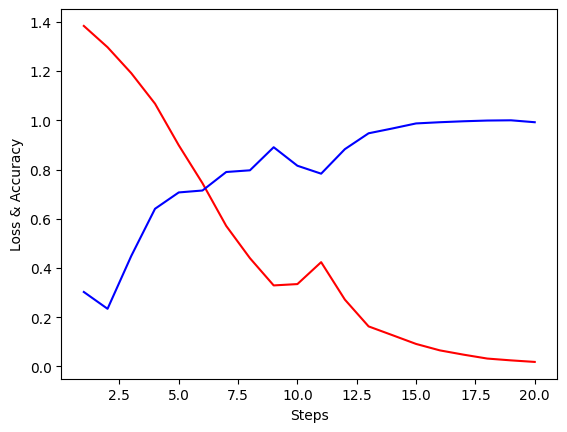

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a, loss_list, 'r')
plt.plot(a, acc_list, 'b')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.show()

In [ ]:
from torchsummary import summary

cnn = CNN()
summary(cnn, (4, 10, 10))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 32, 9, 9]           2,080
         MaxPool2d-2             [-1, 32, 8, 8]               0
            Conv2d-3             [-1, 64, 7, 7]          32,832
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Linear-5                  [-1, 256]         590,080
           Dropout-6                  [-1, 256]               0
            Linear-7                    [-1, 4]           1,028
Total params: 626,020
Trainable params: 626,020
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 2.39
Estimated Total Size (MB): 2.47
----------------------------------------------------------------


In [ ]:
arr1 = pd.DataFrame(loss_list)
arr1.to_excel('/content/drive/MyDrive/KCCP/loss_list.xlsx', index=False, header=False)
arr2 = pd.DataFrame(acc_list)
arr2.to_excel('/content/drive/MyDrive/KCCP/acc_list.xlsx', index=False, header=False)

In [ ]:
test_loader

In [ ]:
total_step = len(test_loader)
print(total_step)
loss_list_test = []
acc_list_test = []
with torch.no_grad():
    for i, (signals, labels) in enumerate(test_loader):
        # Run the forward pass
        #print(labels)
        signals=signals
        labels=labels
        outputs = cnn(signals.double())
        loss = criterion(outputs, labels.long())
        loss_list_test.append(loss.item())
        if epoch%10 ==0:
            print(loss)
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list_test.append(correct / total)
        #print(outputs.shape)
        #print(outputs)
        #print(predicted)
        #print(labels.shape)
        if (epoch) % 1 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

2
Epoch [5/5], Step [1/2], Loss: 0.0114, Accuracy: 100.00%
Epoch [5/5], Step [2/2], Loss: 0.0125, Accuracy: 99.65%


In [ ]:
labels

tensor([1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 1,
        2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 3, 3])

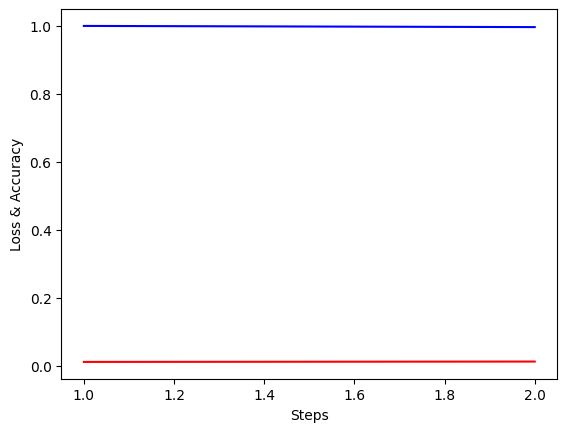

In [ ]:
b =[]
for i in range(len(loss_list_test)):
  b.append(i+1)
b = np.array(b)

plt.plot(b, loss_list_test, 'r')
plt.plot(b, acc_list_test, 'b')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.show()

In [ ]:
loss_list_test

In [ ]:
predicted


tensor([1, 2, 2, 2])

In [ ]:
arr1 = pd.DataFrame(loss_list_test)
arr1.to_excel('/content/drive/MyDrive/KCCP/loss_list_test.xlsx', index=False, header=False)
arr2 = pd.DataFrame(acc_list_test)
arr2.to_excel('/content/drive/MyDrive/KCCP/acc_list_test.xlsx', index=False, header=False)

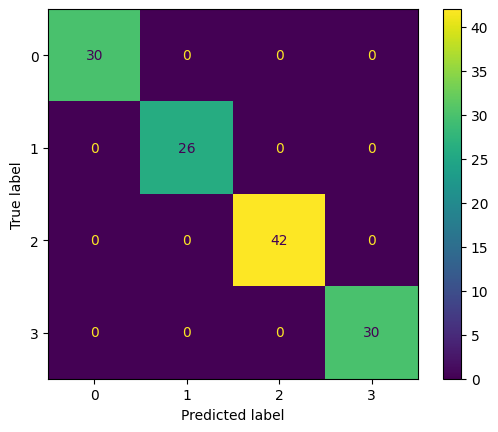

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(labels, predicted)

cm_display = ConfusionMatrixDisplay(cm).plot()


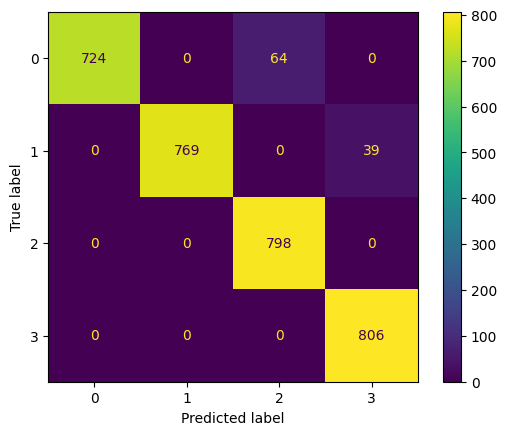

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnn.eval()
train_preds = []
train_labels = []
with torch.no_grad():
    for data, target in train_loader:
        output = cnn(data.double())
        _, preds = torch.max(output, 1)
        train_preds.extend(preds.tolist())
        train_labels.extend(target.tolist())

cm = confusion_matrix(train_labels, train_preds)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
arr1 = pd.DataFrame(labels)
arr1.to_excel('/content/drive/MyDrive/KCCP/labels.xlsx', index=False, header=False)
arr2 = pd.DataFrame(predicted)
arr2.to_excel('/content/drive/MyDrive/KCCP/predicted.xlsx', index=False, header=False)

In [ ]:
from operator import truediv

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 1.0, 0.9859154929577465, 1.0]
Recall: [0.987012987012987, 1.0, 1.0, 1.0]


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(labels, predicted, average='macro')
print('F1 score:', f1)

F1 score: 0.9965929634265054


In [ ]:
# if you need to save
torch.save(cnn,'cnnTC3_fold3_45.pth')

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.41 MiB | 33.14 MiB/s, done.
Resolving deltas: 100% (488/488), done.
